# ML Foreclosure Binary Classification - EPOCH1 25% sample dataset
Only "resolved" outcomes - Either paid off or default 

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured
        * 06 = Repurchased
        * 16 = Reperforming Loan Sale

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *
pd.set_option('display.max_columns', None)


# Importing the data - don't use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [2]:
df=pd.read_csv("data/FM_Acq2_Perf_FMAC_EPOCH1_loanAge_25pct.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,monMatur,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,1048254,1049049,143230100085,C,"CITIMORTGAGE, INC.",5.625,166000,360,2003-04-01,80.0,80.0,2.0,26.0,R,AL,350,0.0,0.0,740.0,740.0,740.0,185,380.0,13820,9.0,166,17,10.0,5.85,5.79,5.8125,0.010363,3.84,-0.225,0.165,-0.1875,-0.038462,0.028497,-0.032258
1,1503985,1504780,744606264337,B,"WELLS FARGO BANK, N.A.",4.500,123000,120,2004-04-01,27.0,27.0,2.0,56.0,R,NJ,80,0.0,0.0,784.0,705.0,744.5,119,1.0,37980,1.0,118,1,1.0,6.01,5.52,5.8300,0.088768,3.91,-1.510,1.020,-1.3300,-0.251248,0.184783,-0.228130
2,366713,367508,497170964573,R,RBC MORTGAGE COMPANY,6.500,177000,360,2001-11-01,78.0,78.0,2.0,30.0,R,WA,986,0.0,0.0,586.0,586.0,586.0,42,318.0,38900,1.0,27,15,2.0,7.02,6.45,6.6580,0.088372,4.24,-0.520,-0.050,-0.1580,-0.074074,-0.007752,-0.023731
3,1344840,1345635,845160346803,R,"CITIMORTGAGE, INC.",5.750,191000,180,2003-09-01,26.0,26.0,2.0,9.0,R,WA,980,0.0,0.0,771.0,760.0,765.5,63,117.0,42660,1.0,61,1,1.0,6.44,5.98,6.1475,0.076923,4.45,-0.690,0.230,-0.3975,-0.107143,0.038462,-0.064660
4,1034016,1034811,794196321261,R,OTHER,6.125,95000,360,2003-04-01,80.0,80.0,2.0,47.0,R,IL,626,0.0,0.0,746.0,743.0,744.5,140,220.0,0,1.0,139,2,2.0,5.85,5.79,5.8125,0.010363,3.84,0.275,-0.335,0.3125,0.047009,-0.057858,0.053763


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569592 entries, 0 to 569591
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          569592 non-null  int64  
 1   Unnamed: 0.1        569592 non-null  int64  
 2   id                  569592 non-null  int64  
 3   origChannel         569592 non-null  object 
 4   sellerName          569592 non-null  object 
 5   origIntRate         569592 non-null  float64
 6   origUPB             569592 non-null  int64  
 7   origLoanTerm        569592 non-null  int64  
 8   origDate            569592 non-null  object 
 9   origLTV             569592 non-null  float64
 10  origCLTV            569592 non-null  float64
 11  numBorrowers        569592 non-null  float64
 12  origDebtIncRatio    569592 non-null  float64
 13  loanPurp            569592 non-null  object 
 14  propState           569592 non-null  object 
 15  zipCode             569592 non-nul

## Remove columns not involved in 'Foreclosure or Not' query

In [4]:
df.drop(['Unnamed: 0','id','fredRate',\
         'bestCreditScore','worstCreditScore','monMatur',\
         'deliqGood','deliqBad','deliqMax',\
        'fmacRateMax','fmacRateMin','fmacRateVolatility',\
        'rateDiffAbove','rateDiffBelow','rateDiffAbovePct','rateDiffBelowPct',\
        ],1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569592 entries, 0 to 569591
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      569592 non-null  int64  
 1   origChannel       569592 non-null  object 
 2   sellerName        569592 non-null  object 
 3   origIntRate       569592 non-null  float64
 4   origUPB           569592 non-null  int64  
 5   origLoanTerm      569592 non-null  int64  
 6   origDate          569592 non-null  object 
 7   origLTV           569592 non-null  float64
 8   origCLTV          569592 non-null  float64
 9   numBorrowers      569592 non-null  float64
 10  origDebtIncRatio  569592 non-null  float64
 11  loanPurp          569592 non-null  object 
 12  propState         569592 non-null  object 
 13  zipCode           569592 non-null  int64  
 14  pMIperct          569592 non-null  float64
 15  mortInsType       569592 non-null  float64
 16  avgCreditScore    56

### Check if any columns have a null value

In [6]:
df.apply(lambda x: x.isnull().sum(), axis=0)

Unnamed: 0.1        0
origChannel         0
sellerName          0
origIntRate         0
origUPB             0
origLoanTerm        0
origDate            0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
loanPurp            0
propState           0
zipCode             0
pMIperct            0
mortInsType         0
avgCreditScore      0
loanAge             0
mSA                 0
zeroBalCode         0
fmacRateAvg         0
rateDiffAvg         0
rateDiffAvgPct      0
dtype: int64

## Engineer originDate into Date features

In [7]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [8]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [9]:
df.drop(['origDate'],1,inplace=True)

In [10]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2003,4
1,2004,4
2,2001,11
3,2003,9
4,2003,4


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [11]:
df.zeroBalCode.unique()

array([ 9.,  1., 16.,  3.,  6., 15.,  2.])

In [12]:
df['zeroBalCode'] = df.zeroBalCode.replace([1,6,16],0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,2,15],1)

In [13]:
df.zeroBalCode.unique()

array([1., 0.])

In [14]:
#Checking datatypes of individual feature
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth
0,1049049,C,"CITIMORTGAGE, INC.",5.625,166000,360,80.0,80.0,2.0,26.0,R,AL,350,0.0,0.0,740.0,185,13820,1.0,5.8125,-0.1875,-0.032258,2003,4
1,1504780,B,"WELLS FARGO BANK, N.A.",4.500,123000,120,27.0,27.0,2.0,56.0,R,NJ,80,0.0,0.0,744.5,119,37980,0.0,5.8300,-1.3300,-0.228130,2004,4
2,367508,R,RBC MORTGAGE COMPANY,6.500,177000,360,78.0,78.0,2.0,30.0,R,WA,986,0.0,0.0,586.0,42,38900,0.0,6.6580,-0.1580,-0.023731,2001,11
3,1345635,R,"CITIMORTGAGE, INC.",5.750,191000,180,26.0,26.0,2.0,9.0,R,WA,980,0.0,0.0,765.5,63,42660,0.0,6.1475,-0.3975,-0.064660,2003,9
4,1034811,R,OTHER,6.125,95000,360,80.0,80.0,2.0,47.0,R,IL,626,0.0,0.0,744.5,140,0,0.0,5.8125,0.3125,0.053763,2003,4


# Review values for dates and slice (if needed) the timeframe you want

In [15]:
df.origYear.unique()

array([2003, 2004, 2001, 2000, 2002, 2006, 2005, 2007, 2008, 1999],
      dtype=int64)

In [16]:
df['origMonth'].unique()

array([ 4, 11,  9,  7,  3,  5,  6, 10,  1,  8,  2, 12], dtype=int64)

In [17]:
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth
0,1049049,C,"CITIMORTGAGE, INC.",5.625,166000,360,80.0,80.0,2.0,26.0,R,AL,350,0.0,0.0,740.0,185,13820,1.0,5.8125,-0.1875,-0.032258,2003,4
1,1504780,B,"WELLS FARGO BANK, N.A.",4.500,123000,120,27.0,27.0,2.0,56.0,R,NJ,80,0.0,0.0,744.5,119,37980,0.0,5.8300,-1.3300,-0.228130,2004,4
2,367508,R,RBC MORTGAGE COMPANY,6.500,177000,360,78.0,78.0,2.0,30.0,R,WA,986,0.0,0.0,586.0,42,38900,0.0,6.6580,-0.1580,-0.023731,2001,11
3,1345635,R,"CITIMORTGAGE, INC.",5.750,191000,180,26.0,26.0,2.0,9.0,R,WA,980,0.0,0.0,765.5,63,42660,0.0,6.1475,-0.3975,-0.064660,2003,9
4,1034811,R,OTHER,6.125,95000,360,80.0,80.0,2.0,47.0,R,IL,626,0.0,0.0,744.5,140,0,0.0,5.8125,0.3125,0.053763,2003,4


# Coerce the column dtype (int in this case)

In [18]:
df = df.astype({'origLTV':'int','origCLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'mortInsType':'int','loanAge':'int',\
               'avgCreditScore':'int','zeroBalCode':'int'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569592 entries, 0 to 569591
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      569592 non-null  int64  
 1   origChannel       569592 non-null  object 
 2   sellerName        569592 non-null  object 
 3   origIntRate       569592 non-null  float64
 4   origUPB           569592 non-null  int64  
 5   origLoanTerm      569592 non-null  int64  
 6   origLTV           569592 non-null  int32  
 7   origCLTV          569592 non-null  int32  
 8   numBorrowers      569592 non-null  int32  
 9   origDebtIncRatio  569592 non-null  int32  
 10  loanPurp          569592 non-null  object 
 11  propState         569592 non-null  object 
 12  zipCode           569592 non-null  int64  
 13  pMIperct          569592 non-null  float64
 14  mortInsType       569592 non-null  int32  
 15  avgCreditScore    569592 non-null  int32  
 16  loanAge           56

<a id='MLReady'></a>

# Train Test Split to create holdout dataset outside of PyCaret

In [20]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good + bad)*100,2)
print(f'We have {perct_bad}% Foreclosures in our dataset')

We have 15.45% Foreclosures in our dataset


In [21]:
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(
    df.drop(['zeroBalCode'], axis=1)
    , df['zeroBalCode']
    , test_size = .1
    , random_state=12
)

In [22]:
# Further split the training data into training/test
x_train, x_val, y_train, y_val = train_test_split(
    training_features
    , training_target
    , test_size = .1
    ,random_state=12
)

In [23]:
# For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [24]:
print('#############################################')
print('Before oversampling: "Closed" crushes "Default" and causes issues:')
print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

#############################################
Before oversampling: "Closed" crushes "Default" and causes issues:
0    433522
1     79110
Name: zeroBalCode, dtype: int64


# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [25]:
y_train.shape

(461368,)

In [26]:
df = x_train.copy()

In [27]:
df['zeroBalCode'] = y_train

In [28]:
df.shape

(461368, 24)

# Review metrics last time before run (to have record of starting values)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461368 entries, 426394 to 516955
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      461368 non-null  int64  
 1   origChannel       461368 non-null  object 
 2   sellerName        461368 non-null  object 
 3   origIntRate       461368 non-null  float64
 4   origUPB           461368 non-null  int64  
 5   origLoanTerm      461368 non-null  int64  
 6   origLTV           461368 non-null  int32  
 7   origCLTV          461368 non-null  int32  
 8   numBorrowers      461368 non-null  int32  
 9   origDebtIncRatio  461368 non-null  int32  
 10  loanPurp          461368 non-null  object 
 11  propState         461368 non-null  object 
 12  zipCode           461368 non-null  int64  
 13  pMIperct          461368 non-null  float64
 14  mortInsType       461368 non-null  int32  
 15  avgCreditScore    461368 non-null  int32  
 16  loanAge        

In [30]:
df.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth,zeroBalCode
426394,745223,C,"FLAGSTAR BANK, FSB",5.375,178000,180,66,66,1,37,C,IN,462,0.0,0,775,40,26900,6.0680,-0.6930,-0.114206,2002,11,0
839,237214,C,"JPMORGAN CHASE BANK, NA",8.250,55000,360,60,60,1,33,C,NC,277,0.0,0,565,22,20500,7.0775,1.1725,0.165666,2001,4,0
472984,175628,B,"BANK OF AMERICA, N.A.",7.500,83000,360,75,75,1,58,R,KY,405,0.0,0,664,50,30460,7.0500,0.4500,0.063830,2001,2,1
48956,518150,C,"BANK OF AMERICA, N.A.",6.750,116000,120,67,67,2,35,R,FL,320,0.0,0,792,17,27260,6.8925,-0.1425,-0.020675,2002,2,0
537190,605236,B,"FLAGSTAR BANK, FSB",6.375,153000,360,72,72,1,44,P,MI,481,0.0,0,734,72,19820,6.2900,0.0850,0.013514,2002,8,1


# Pycaret - Setup with categorical definition

## Use Basic setup

In [31]:
model_setup = setup(df, target='zeroBalCode')

Setup Succesfully Completed!


,Description,Value
0,session_id,8114
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(461368, 24)"
4,Missing Values,False
5,Numeric Features,17
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Use complex setup 

In [32]:
# model_setup = setup(
#     df
#     , target = 'zeroBalCode' # PyCaret will list this as "Label"
#     , normalize = True
#     , transformation = False
#     , pca = False 
#     , ignore_low_variance = False # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value. 
#     , ignore_features = None
#     , handle_unknown_categorical = True
#     , remove_outliers = True
#     , remove_multicollinearity = False
#     , polynomial_features = False
#     , trigonometry_features = False
#     , feature_selection = False
#     , feature_interaction = False
#     , fix_imbalance = False
#     , silent = True
#     , profile = False
#     # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
#     , bin_numeric_features = [
#         'avgCreditScore'
#         ] # Set to True to bin numerics using K Means
#     , categorical_features = [
#          'origChannel'
#         , 'loanPurp'
#         , 'origYear'
#         , 'origMonth'
#         , 'mortInsType'
#         , 'origLoanTerm'
#         ]
#     , high_cardinality_features = [
#          'propState'
#         , 'sellerName'
#         , 'mSA'
#         , 'zipCode'
#     ]
#     , high_cardinality_method = 'clustering'
#     , numeric_features = [
#         'origIntRate'
#         , 'numBorrowers'
#         , 'origUPB'
#         , 'origLTV'
#         , 'origCLTV'
#         , 'pMIperct'
#         , 'loanAge'
#         , 'origDebtIncRatio'
#         , 'avgCreditScore'
#         , 'rateDiffAvg'
#         , 'rateDiffAvgPct'
#         , 'fmacRateAvg'
#     ]
# )

## Compare Models with no blacklist exclusions

In [33]:
model_results=compare_models(sort='Recall') #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Quadratic Discriminant Analysis,0.2206,0.5103,0.9232,0.1580,0.2656,0.0071,0.0295,2.8692
1,Decision Tree Classifier,0.8047,0.6370,0.3944,0.3739,0.3839,0.2679,0.2681,5.6513
2,CatBoost Classifier,0.8749,0.8667,0.3319,0.6990,0.4500,0.3894,0.4240,21.3753
3,Extreme Gradient Boosting,0.8712,0.8593,0.3214,0.6727,0.4350,0.3724,0.4049,22.6041
4,Naive Bayes,0.8183,0.7530,0.3013,0.3862,0.3385,0.2350,0.2375,0.4638
5,Light Gradient Boosting Machine,0.8702,0.8567,0.2852,0.6920,0.4039,0.3449,0.3879,1.4959
6,Extra Trees Classifier,0.8610,0.8185,0.1846,0.6832,0.2906,0.2408,0.3054,15.2437
7,Random Forest Classifier,0.8564,0.7760,0.1789,0.6198,0.2776,0.2240,0.2782,1.1375
8,Ada Boost Classifier,0.8480,0.8096,0.1753,0.5219,0.2624,0.2004,0.2379,20.3101
9,Gradient Boosting Classifier,0.8595,0.8325,0.1725,0.6735,0.2746,0.2259,0.2915,82.5008


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

## Create models 

### QDA Classifier

In [34]:
qda = create_model('qda', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.1905,0.5207,0.9837,0.1583,0.2726,0.0094,0.0535
1,0.1550,0.5003,0.9997,0.1543,0.2674,0.0002,0.0077
2,0.1758,0.5075,0.9862,0.1561,0.2696,0.0045,0.0324
3,0.6537,0.5386,0.3438,0.1779,0.2345,0.0392,0.0427
4,0.1871,0.5002,0.9518,0.1542,0.2654,-0.0002,-0.0009
5,0.1713,0.5095,0.9923,0.1561,0.2697,0.0043,0.0362
6,0.1556,0.5008,0.9997,0.1544,0.2675,0.0004,0.0128
7,0.1711,0.5091,0.9931,0.1561,0.2699,0.0045,0.0379
8,0.1722,0.5066,0.9902,0.1560,0.2696,0.0042,0.0335
9,0.1735,0.5100,0.9914,0.1563,0.2701,0.0049,0.0388


## Evaluate Models

In [35]:
evaluate_model(qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Catboost Classifier

In [36]:
catboost = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8752,0.8669,0.3352,0.6992,0.4532,0.3924,0.4264
1,0.8753,0.8645,0.3350,0.7002,0.4532,0.3925,0.4267
2,0.8761,0.8703,0.3375,0.7052,0.4566,0.3963,0.4307
3,0.8753,0.8628,0.3347,0.7009,0.4530,0.3925,0.4268
4,0.8752,0.8670,0.3324,0.7016,0.4511,0.3906,0.4255
5,0.8742,0.8671,0.3272,0.6966,0.4453,0.3846,0.4197
6,0.8718,0.8667,0.3269,0.6738,0.4402,0.3775,0.4091
7,0.8769,0.8694,0.3407,0.7105,0.4606,0.4006,0.4353
8,0.8754,0.8690,0.3312,0.7047,0.4506,0.3905,0.4261
9,0.8735,0.8630,0.3178,0.6977,0.4367,0.3765,0.4136


## Evaluate Models

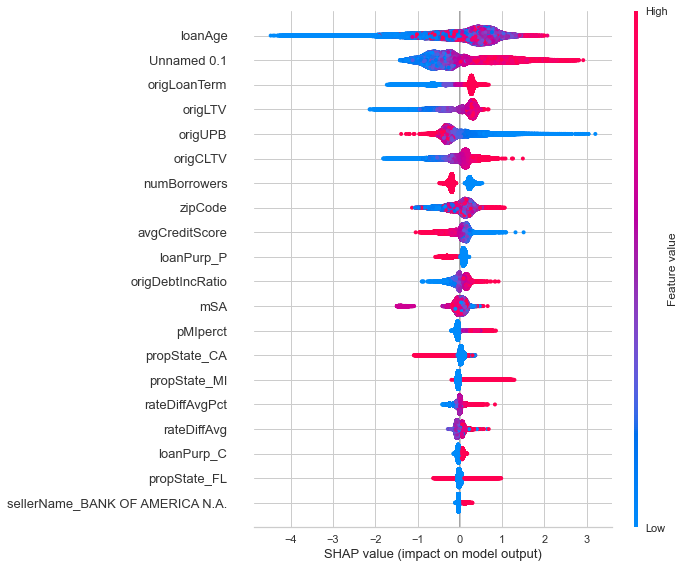

In [38]:
interpret_model(catboost)

### Well that is not a good model! It's the reverse of what we want

## Tune Model

In [35]:
tuned_qda = tune_model(qda, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7019,0.7527,0.6758,0.2940,0.4097,0.2496,0.2883
1,0.7024,0.7551,0.6811,0.2953,0.4120,0.2523,0.2918
2,0.6996,0.7513,0.6847,0.2936,0.4110,0.2504,0.2908
3,0.7061,0.7588,0.6953,0.3010,0.4201,0.2625,0.3038
4,0.7056,0.7529,0.6910,0.2997,0.4181,0.2601,0.3008
5,0.7044,0.7548,0.6746,0.2958,0.4113,0.2522,0.2904
6,0.6993,0.7491,0.6765,0.2919,0.4079,0.2468,0.2860
7,0.6993,0.7497,0.6782,0.2922,0.4084,0.2474,0.2869
8,0.6990,0.7515,0.6836,0.2929,0.4101,0.2492,0.2895
9,0.7037,0.7547,0.6782,0.2958,0.4120,0.2527,0.2916


In [36]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
final_qda = finalize_model(tuned_qda)

In [38]:
evaluate_model(final_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict models

In [39]:
predicted_final_qda = predict_model(final_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7049,0.7543,0.6861,0.2983,0.4158,0.2573,0.2973


In [40]:
predicted_qda = predict_model(qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.704,0.753,0.6847,0.2973,0.4145,0.2557,0.2955


In [41]:
predicted_qda_tuned = predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.704,0.753,0.6847,0.2973,0.4145,0.2557,0.2955


# The golden moment... put 10% sample test data through the models...

# Recombine test_features, test_target at first train/test/split
 This "test" set was split BEFORE Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will recombine the test_features and test_target into one new df

In [42]:
test_features.shape

(56960, 23)

In [43]:
test_target.shape

(56960,)

In [44]:
test_df = test_features.copy()

In [45]:
test_df['zeroBalCode'] = test_target

In [46]:
test_df.shape

(56960, 24)

In [47]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    48092
1     8868
Name: zeroBalCode, dtype: int64
Positive samples are 15.57%


## Create Confusion Matrix output functions

In [48]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalsePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalseNegative'
    else:
        value = 'Undefined'
    return value

In [49]:
def cM(df):
    print(f'           ##############################')
    print(f'           #             #              #')
    print(f'         0 #    {df["TrueNegative"]}     #     {df["FalsePositive"]}      #')
    print(f'  True     #             #              #')
    print(f'  Class    ##############################')
    print(f'           #             #              #')
    print(f'         1 #    {df["FalseNegative"]}      #     {df["TruePositive"]}      #')
    print(f'           #             #              #')
    print(f'           ##############################')
    print(f'                  0              1        ')
    print(f'                  Predicted Class           ')


In [50]:
def cMCalc():
    # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
    totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
    totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
    total = totalNegative + totalPositive
    trueNegativePct = confusionMatrix['TrueNegative'] / total * 100
    falseNegativePct = confusionMatrix['FalseNegative'] / total * 100
    truePositivePct = confusionMatrix['TruePositive'] / total * 100
    falsePositivePct = confusionMatrix['FalsePositive'] / total * 100

    # Accuracy Calculation
    accuracy = (confusionMatrix['TruePositive'] + confusionMatrix['TrueNegative'])/(totalPositive + totalNegative)
    # Recall Calculation
    recall = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalseNegative']))
    # Precision Calculation
    precision = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']))

    print(f'TrueNegative:  {round(trueNegativePct,2)}%')
    print(f'FalseNegative:  {round(falseNegativePct,2)}%')
    print(f'TruePositive:   {round(truePositivePct,2)}%')
    print(f'FalsePositive: {round(falsePositivePct,2)}%')
    print(f'#####################################################')
    print(f'Accuracy: {round(accuracy,2)*100}%   Recall: {round(recall,2)*100}%   Precision: {round(precision,2)*100}%')
    print(f'#####################################################')

# Evaluate Models

In [51]:
predictions = predict_model(final_nb, data=test_df)

In [52]:
pd.set_option('max_columns',None)
predictions.head()

,Unnamed: 0.1,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,avgCreditScore,loanAge,mSA,fmacRateAvg,rateDiffAvg,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,1176140,C,"FLAGSTAR BANK, FSB",5.750,163000,360,95,95,2,43,P,MI,480,25.0,1,715,99,19820,5.2300,0.5200,0.099426,2003,6,0,1,0.7068
1,1908158,C,"CITIMORTGAGE, INC.",6.500,322000,360,80,95,2,48,P,NY,117,0.0,0,730,121,35620,6.6820,-0.1820,-0.027237,2006,6,0,1,0.9894
2,901567,R,OTHER,5.940,132000,360,97,97,1,44,P,IL,600,35.0,1,638,176,16980,5.8425,0.0975,0.016688,2003,2,1,1,0.7960
3,467540,B,"FLAGSTAR BANK, FSB",6.875,166000,360,80,80,2,43,C,UT,841,0.0,0,753,14,41620,6.9975,-0.1225,-0.017506,2002,1,0,0,0.0001
4,1468602,R,OTHER,5.500,64000,300,89,89,2,5,R,NM,871,25.0,1,680,20,10740,5.4450,0.0550,0.010101,2004,3,0,0,0.4393


In [53]:
results = predictions[['zeroBalCode','Label','Score']]

In [54]:
predictions.Label.value_counts()

0    42204
1    14756
Name: Label, dtype: int64

In [55]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [56]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [57]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    38222     #     9870      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    3982      #     4886      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [58]:
cMCalc()

TrueNegative:  67.1%
FalseNegative:  6.99%
TruePositive:   8.58%
FalsePositive: 17.33%
#####################################################
Accuracy: 76.0%   Recall: 55.00000000000001%   Precision: 33.0%
#####################################################


In [82]:
#save_model(final_nb, 'np.final5pct_092020')